In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
sns.set_style('white') # darkgrid, white grid, dark, white and ticks
sns.set_palette(sns.dark_palette('#2ecc71'))
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('font', size=14)          # controls default text sizes

In [9]:
headers = ['Size', 'Workers', 'Native Threads', 'FastFlow', 'Speedup Native', 'Speedup FastFlow']
matrix256 = pd.read_csv("./datasets/MacBook/output_256.csv", names=headers)
matrix512 = pd.read_csv("./datasets/MacBook/output_512.csv", names=headers)
matrix1024 = pd.read_csv("./datasets/MacBook/output_1024.csv", names=headers)
matrix2048 = pd.read_csv("./datasets/MacBook/output_2048.csv", names=headers)
matrix4096 = pd.read_csv("./datasets/MacBook/output_4096.csv", names=headers)
matrix8192 = pd.read_csv("./datasets/MacBook/output_8192.csv", names=headers)
#matrix16384 = pd.read_csv("./datasets/MacBook/output_16384.csv", names=headers)

matricies = [
    matrix256, matrix512, matrix1024, matrix2048, matrix4096, matrix8192, #matrix16384
]

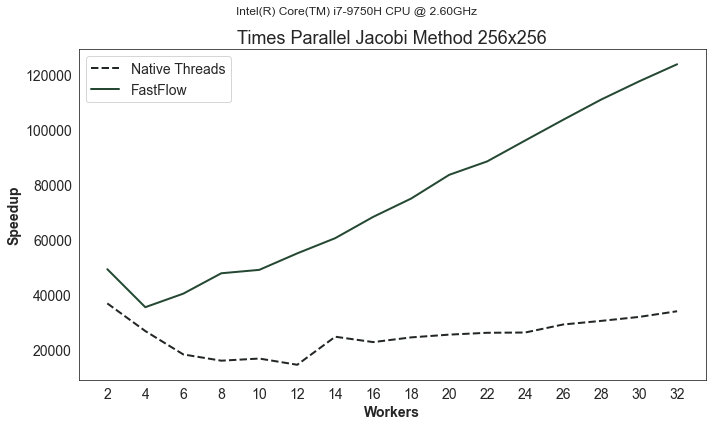

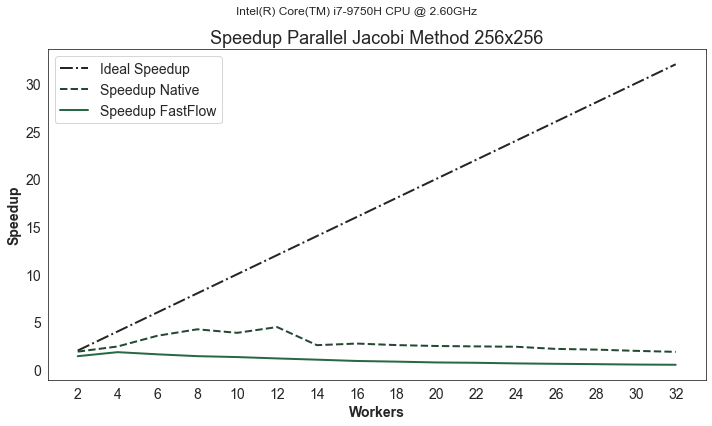

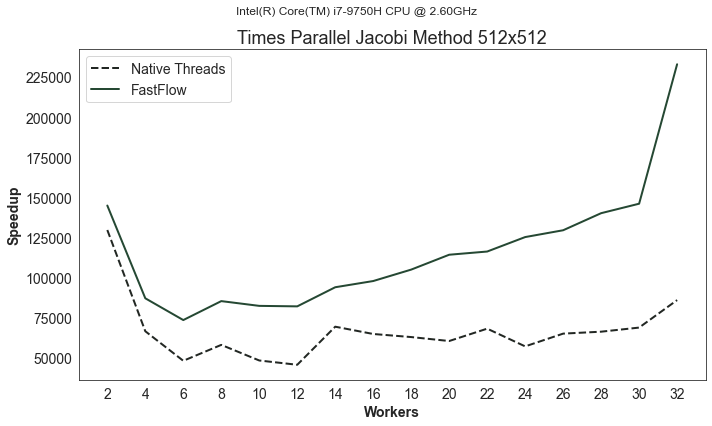

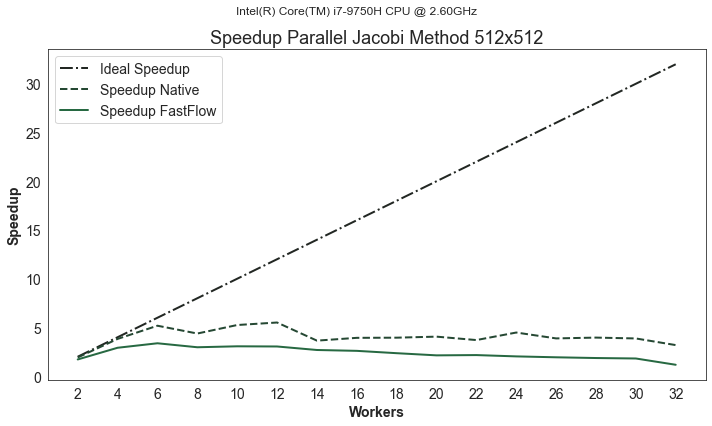

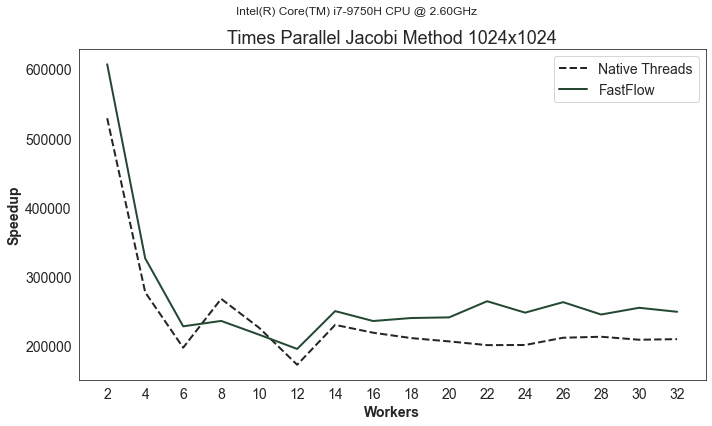

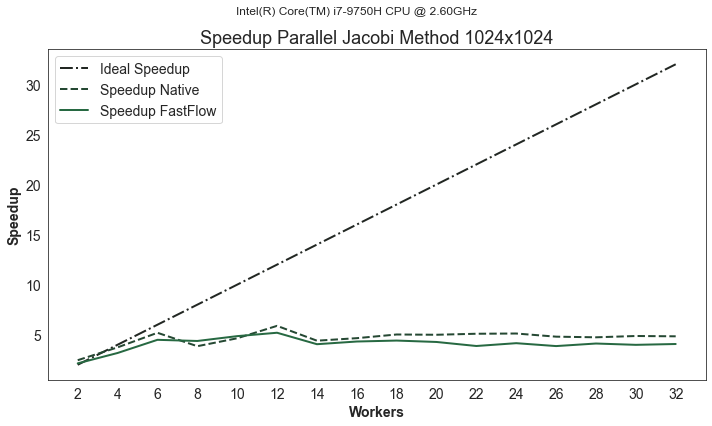

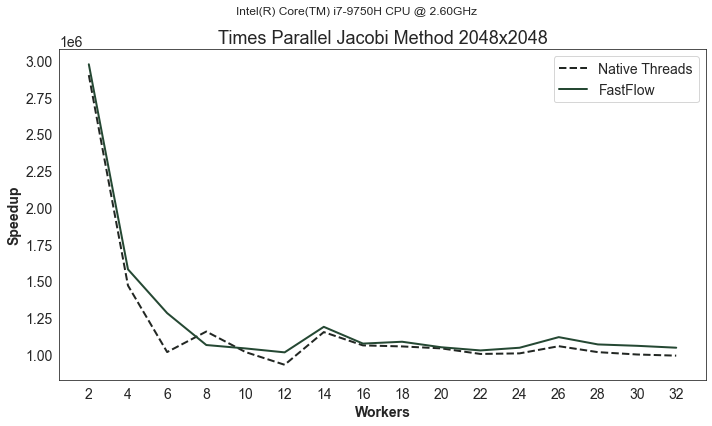

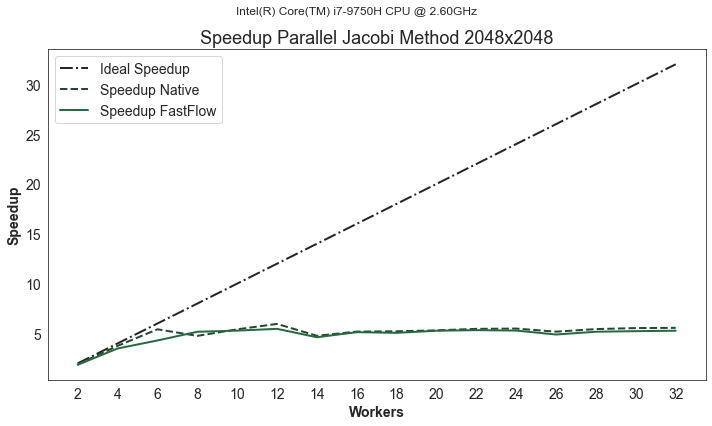

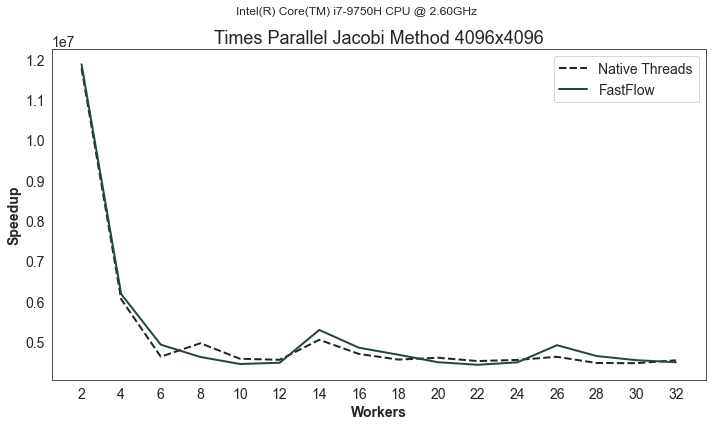

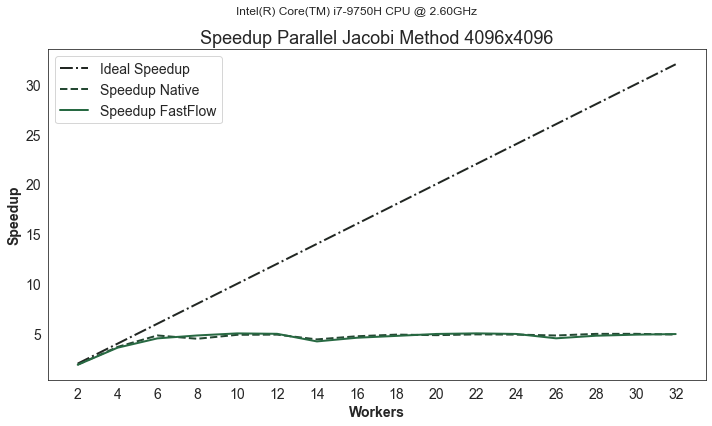

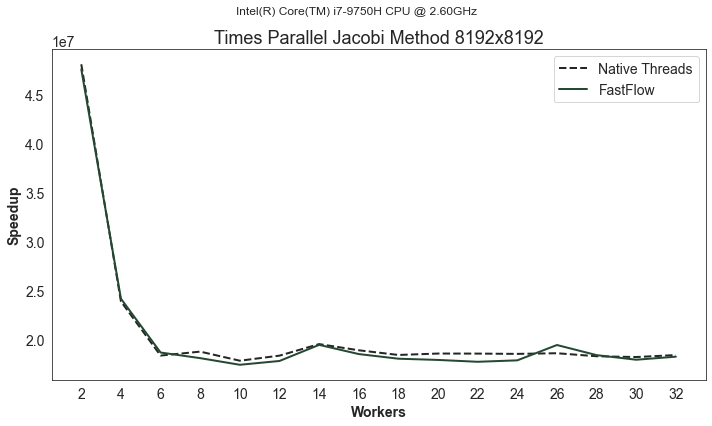

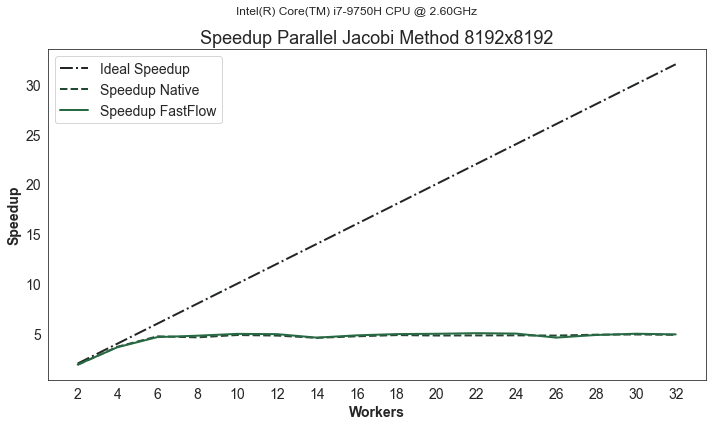

In [10]:
size = 256
plot = 0

macbookCPU = "Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz"
vmCPU = "Intel(R) Xeon(R) Gold 5120 CPU @ 2.20GHz"

for matrix in matricies:
    
    time_plot = pd.DataFrame({
        "Workers":matrix['Workers'], 
        "Native Threads":matrix['Native Threads'], 
        "FastFlow": matrix['FastFlow'], 
        'Speedup Native': matrix['Speedup Native'], 
        'Speedup FastFlow':matrix['Speedup FastFlow'],
        'Ideal Speedup': [i * 2 for i in range(1,17)]
    })
    
    plt.figure(plot, figsize=(10,6), tight_layout=True)
    plt.plot('Workers', 'Native Threads', data=time_plot, linestyle='--', linewidth=2)
    plt.plot('Workers', 'FastFlow', data=time_plot, marker='', linewidth=2)
    
    plt.xticks([i * 2 for i in range(1,17)])
    plt.legend()
    plt.suptitle(macbookCPU)
    plt.title(f"Times Parallel Jacobi Method {size}x{size}")
    plt.xlabel('Workers', fontweight='bold')
    plt.ylabel('Speedup', fontweight='bold')
    plt.savefig(f'./images/MacBook/times_plot_{size}.png')
    
    plot +=1
    
    plt.figure(plot, figsize=(10,6), tight_layout=True)
    plt.plot('Workers', 'Ideal Speedup', data=time_plot, linestyle='-.', linewidth=2)
    plt.plot('Workers', 'Speedup Native', data=time_plot, linestyle='--', linewidth=2)
    plt.plot('Workers', 'Speedup FastFlow', data=time_plot, marker='', linewidth=2)
    
    plt.xticks([i * 2 for i in range(1,17)])
    plt.legend()
    plt.suptitle(macbookCPU)
    plt.title(f"Speedup Parallel Jacobi Method {size}x{size}")
    plt.xlabel('Workers', fontweight='bold')
    plt.ylabel('Speedup', fontweight='bold')
    
    plt.savefig(f'./images/MacBook/speedup_plot_{size}.png')
    plot+=1
    size *= 2